In [2]:
from front_tracking_toolkit.experiment import Experiment
from front_tracking_toolkit.viz import visualize_frames

import matplotlib.pyplot as plt


In [3]:
# Construct a new Experiment instance
exp = Experiment(r'C:\Users\Josh\git\front_tracking_toolkit\front_tracking_toolkit\example_experiment.yaml')

In [4]:
# Describe the experiment, showing some basic information contained
exp.describe()

Experiment Configuration:
Property                  Value
------------------------  ---------------------------------------------------------
basedir                   E:\Flow Pictures - complete data set\Flow Images\analysis
tracking_pattern          tracking_15/{subject}/{stain}/vf.csv
processed_images_pattern  processed/{subject}/{stain}/*.tif
tracking_image_stage      processed


Experiment Metadata:
  subject  stain      scale_factor  scale_units    genotype
---------  -------  --------------  -------------  ---------------------
       10  ova           0.0102462  mm             Twist CKO+
       31  ova           0.0102231  mm             Twist CKO+
       47  ova           0.0102927  mm             Twist CKO+
       84  ova           0.0102231  mm             Twist CKO+
      118  ova           0.0102462  mm             Twist CKO+
      126  ova           0.0102001  mm             Twist CKO+
      132  ova           0.0102231  mm             Twist CKO+
        9  ova           

In [5]:
# Experiment metadata is a pandas dataframe
exp.metadata

,,scale_factor,scale_units,genotype
subject,stain,,,
10,ova,0.010246,mm,Twist CKO+
31,ova,0.010223,mm,Twist CKO+
47,ova,0.010293,mm,Twist CKO+
84,ova,0.010223,mm,Twist CKO+
118,ova,0.010246,mm,Twist CKO+
126,ova,0.010200,mm,Twist CKO+
132,ova,0.010223,mm,Twist CKO+
9,ova,0.010177,mm,Twist CKO+; Sm22a-Cre
12,ova,0.010000,mm,Twist CKO+; Sm22a-Cre


In [6]:
# Enumerate unique subjects and stains
print(exp.subjects)
print(exp.stains)

['10', '118', '12', '126', '127', '132', '31', '47', '75', '76', '77', '79', '80', '83', '84', '9']
['ova']


In [7]:
# Enumerate samples in the experiment
print(exp.samples)

[Sample('10', 'ova'), Sample('31', 'ova'), Sample('47', 'ova'), Sample('84', 'ova'), Sample('118', 'ova'), Sample('126', 'ova'), Sample('132', 'ova'), Sample('9', 'ova'), Sample('12', 'ova'), Sample('75', 'ova'), Sample('76', 'ova'), Sample('77', 'ova'), Sample('79', 'ova'), Sample('83', 'ova'), Sample('80', 'ova'), Sample('127', 'ova')]


In [8]:
# Select a sample for the cells below and show some information
sample = exp.samples[0]
sample.describe()

Sample('10', 'ova')
Attribute              Value
---------------------  ------------
Subject                10
Stain                  ova
Has Mask               False
Scale                  1.025E-02 mm
# raw images           61
# preprocessed images  61


Subject Metadata:
Attribute    Value
-----------  ----------
genotype     Twist CKO+


In [9]:
# Load images for a sample, and then visualize them
frames = sample.load_images()
visualize_frames(frames)

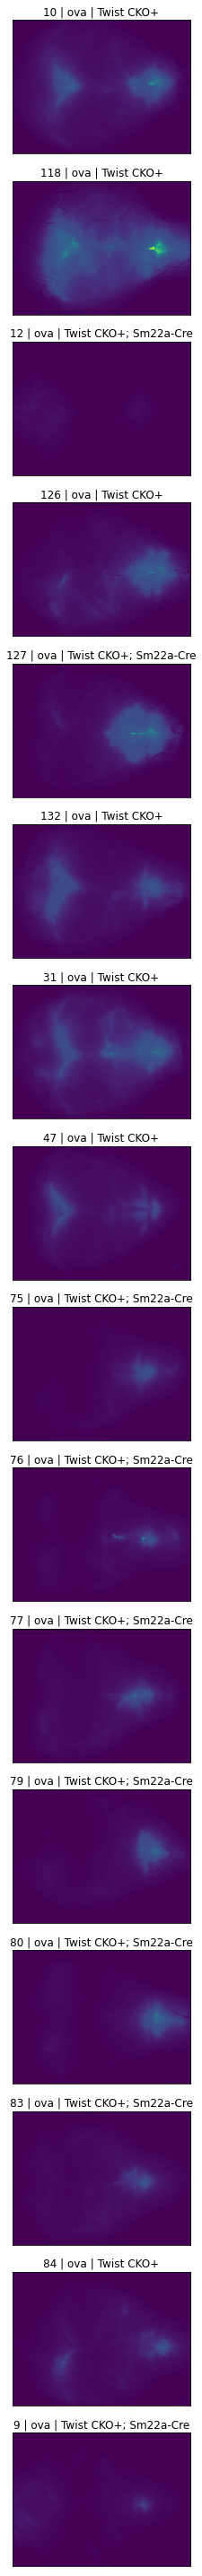

In [10]:
# plot the last frame from all samples
meta = exp.metadata
fig, axs = plt.subplots(len(exp.subjects), len(exp.stains), squeeze=False, figsize=(80, 40))
for sub_i, subject in enumerate(exp.subjects):
    for stn_i, stain in enumerate(exp.stains):
        if exp.has_sample(subject, stain):
            ax = axs[sub_i, stn_i]
            ax.imshow(exp.load_images(subject, stain, t=-1), vmin=0, vmax=255)
            genotype = meta.loc[(subject, stain)]["genotype"]
            ax.set_title(f'{subject} | {stain} | {genotype}')
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
fig.tight_layout()

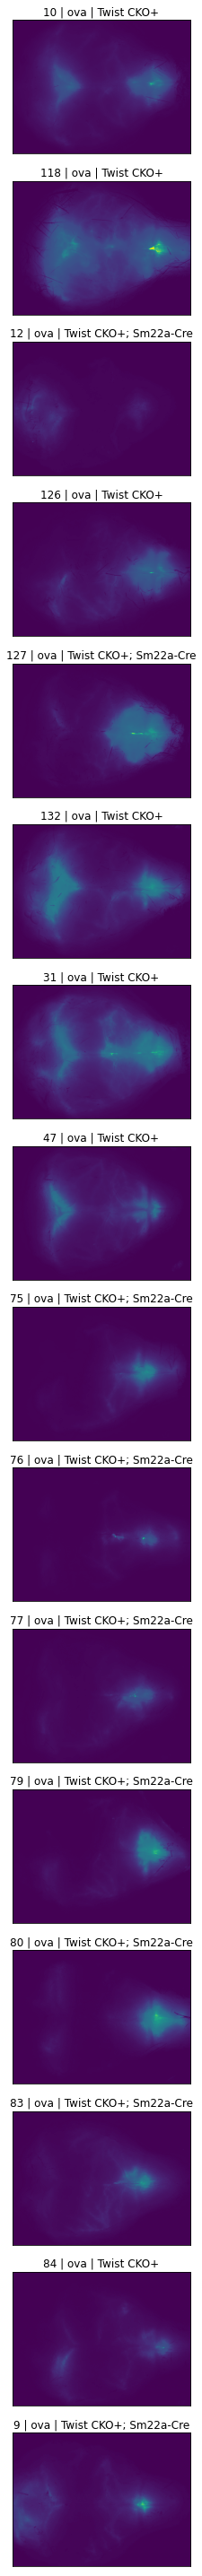

In [11]:
# plot the last frame from all samples
meta = exp.metadata
fig, axs = plt.subplots(len(exp.subjects), len(exp.stains), squeeze=False, figsize=(80, 40))
for sub_i, subject in enumerate(exp.subjects):
    for stn_i, stain in enumerate(exp.stains):
        if exp.has_sample(subject, stain):
            ax = axs[sub_i, stn_i]
            ax.imshow(exp.load_images(subject, stain, t=-1, stage="preprocessed"), vmin=0, vmax=255)
            genotype = meta.loc[(subject, stain)]["genotype"]
            ax.set_title(f'{subject} | {stain} | {genotype}')
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
fig.tight_layout()

In [ ]:
exp.get_effective_tracking_options(